In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/processed_fb_ad_camps.csv')

In [4]:
df.head()

,Ad_ID,Company_Campaign_ID,FB_campaign_ID,Age,Gender,interest,Impressions,Clicks,Spent,Total_Conversion,Ctr,Cpc,Conversion_Rate,Cpa
0,708746,916,103916,32,M,15,7350,1,1.43,2,0.000136,1.43,2.0,0.715
1,708749,916,103917,32,M,16,17861,2,1.82,2,0.000112,0.91,1.0,0.910
2,708771,916,103920,32,M,20,693,0,0.00,1,0.000000,0.00,0.0,0.000
3,708815,916,103928,32,M,28,4259,1,1.25,1,0.000235,1.25,1.0,1.250
4,708818,916,103928,32,M,28,4133,1,1.29,1,0.000242,1.29,1.0,1.290


# **Missing Values**

In [5]:
feature_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]

if len(feature_with_na) > 0:
    for feature in feature_with_na:
        print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else: print('No missing values')

No missing values


# **Numerical Variables** 

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical features: ', len(numerical_features))

df[numerical_features].head()

Number of numerical features:  13


,Ad_ID,Company_Campaign_ID,FB_campaign_ID,Age,interest,Impressions,Clicks,Spent,Total_Conversion,Ctr,Cpc,Conversion_Rate,Cpa
0,708746,916,103916,32,15,7350,1,1.43,2,0.000136,1.43,2.0,0.715
1,708749,916,103917,32,16,17861,2,1.82,2,0.000112,0.91,1.0,0.910
2,708771,916,103920,32,20,693,0,0.00,1,0.000000,0.00,0.0,0.000
3,708815,916,103928,32,28,4259,1,1.25,1,0.000235,1.25,1.0,1.250
4,708818,916,103928,32,28,4133,1,1.29,1,0.000242,1.29,1.0,1.290


**Discrete variables**

In [7]:
# We will check for discrete numerical variables
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in ['Ad_ID', 'interest', 'FB_campaign_ID', 'age']]
print('Number of discrete features: ', len(discrete_features)) 

Number of discrete features:  2


In [8]:
discrete_features

['Company_Campaign_ID', 'Age']

In [9]:
df[discrete_features].head()

,Company_Campaign_ID,Age
0,916,32
1,916,32
2,916,32
3,916,32
4,916,32


**Let's find the relationship between our discrete features and conversions**

C:\Users\S580381\AppData\Local\Temp\ipykernel_20544\2076732905.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')


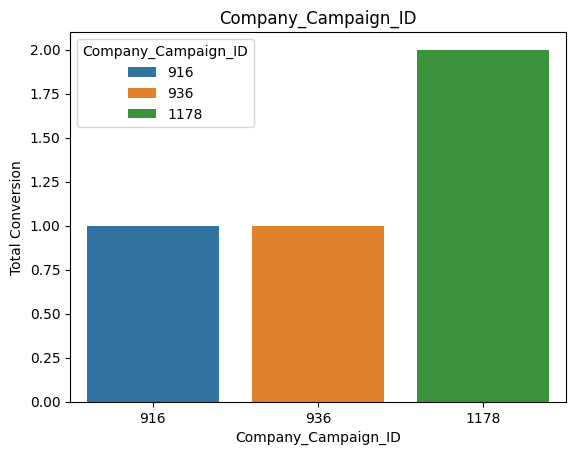

C:\Users\S580381\AppData\Local\Temp\ipykernel_20544\2076732905.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')


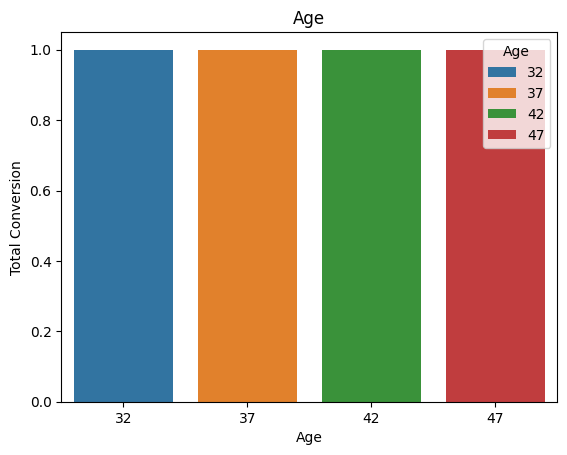

In [10]:
for feature in discrete_features:
    data = df.copy()
    sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')
    plt.xlabel(feature)
    plt.ylabel('Total Conversion')
    plt.title(feature)
    plt.show()

We can see that campaign 1178 has the biggest total conversion median, and that ages have the same total conversion median. 

**Continuous Variables**

In [11]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in ['Ad_ID', 'interest', 'FB_campaign_ID']]
print('Number of continuous features: ', len(continuous_features))


Number of continuous features:  8


Let's analyze our continuous values to understand the distribution


First, we check for linearity

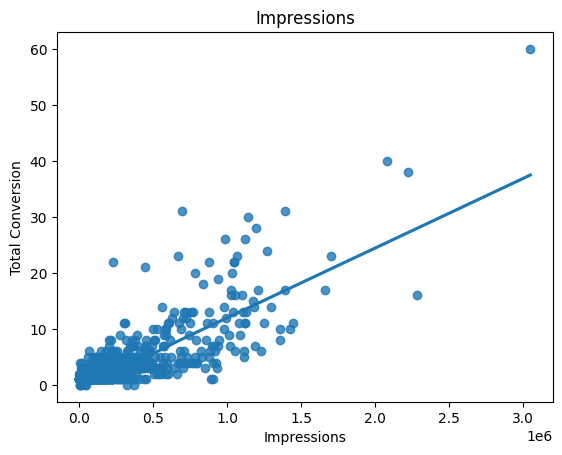

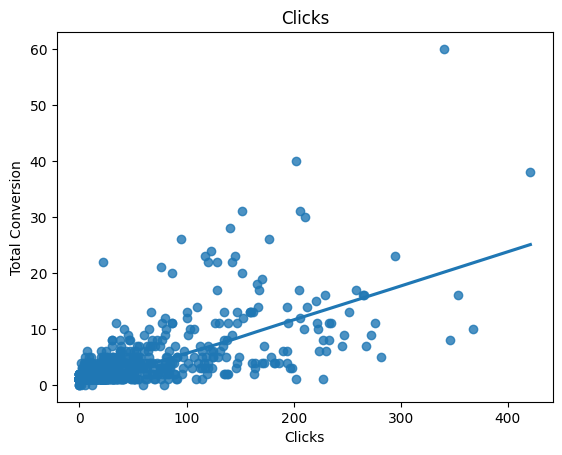

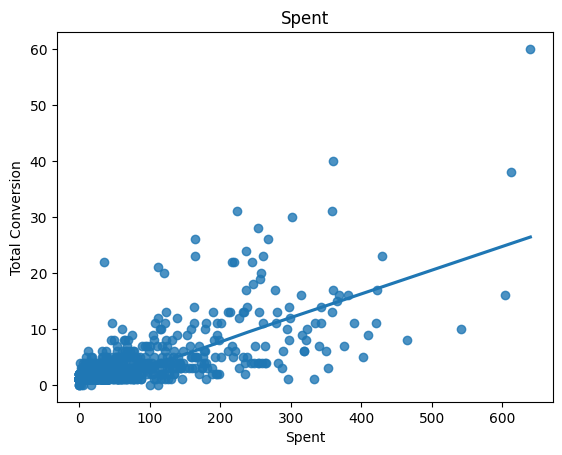

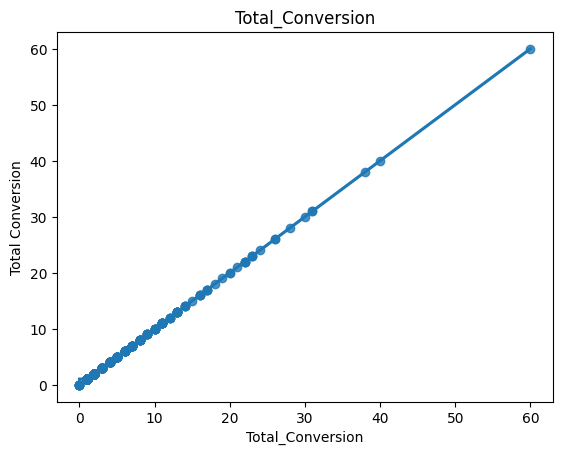

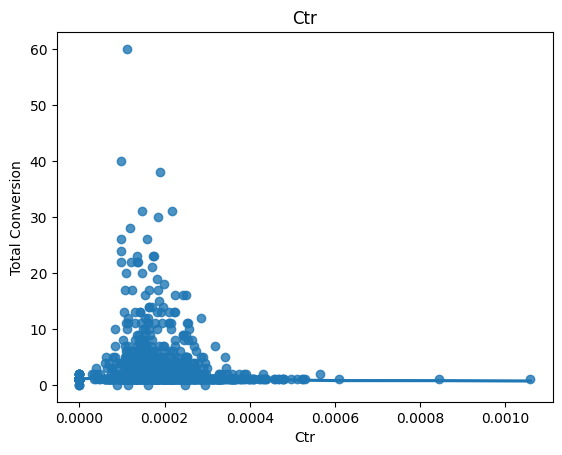

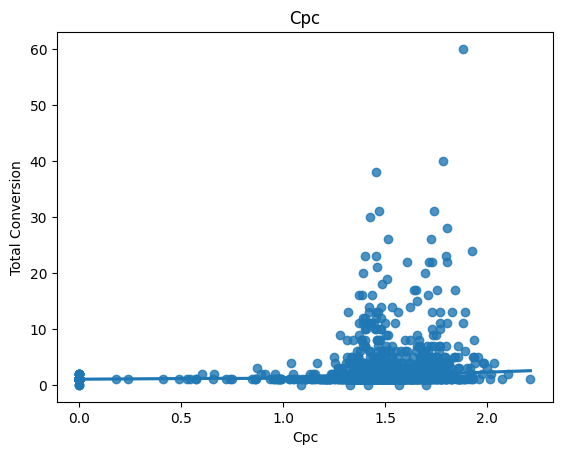

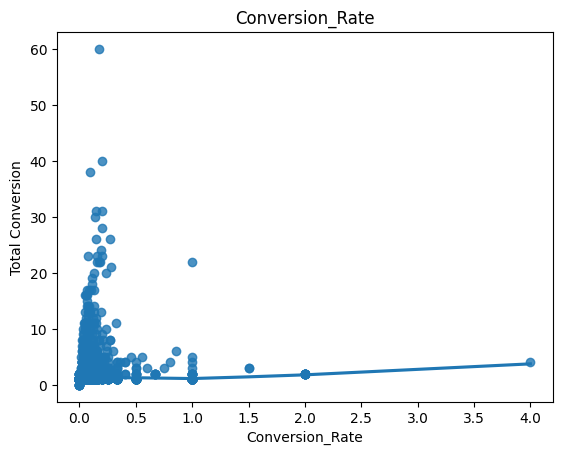

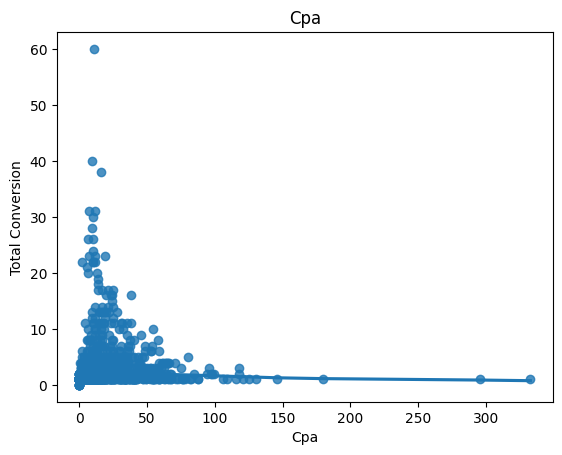

In [12]:
for feature in continuous_features:
    data = df.copy()
    sns.regplot(x=feature, y='Total_Conversion', data=data, lowess=True)
    plt.xlabel(feature)
    plt.ylabel('Total Conversion')
    plt.title(feature)
    plt.show()

We can see that CPC, CTR, CPA and Conversion rate have little to no effect on the data. We will not be using them for our model. However we can see a small linearity when it comes to Impressions, Clicks and Spent, but is heavily clustered near 0.

In [13]:
final_continuous_features = [feature for feature in continuous_features if feature not in ['Ad_ID', 'interest', 'FB_campaign_ID', 'Cpc', 'Ctr', 'Cpa', 'Conversion_Rate']]
print('Number of continuous features: ', len(final_continuous_features))

Number of continuous features:  4


C:\Users\S580381\AppData\Local\Temp\ipykernel_20544\441201559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], bins=30, kde=True)


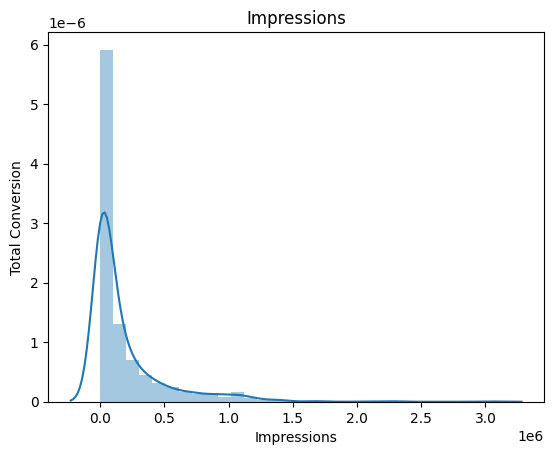

C:\Users\S580381\AppData\Local\Temp\ipykernel_20544\441201559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], bins=30, kde=True)


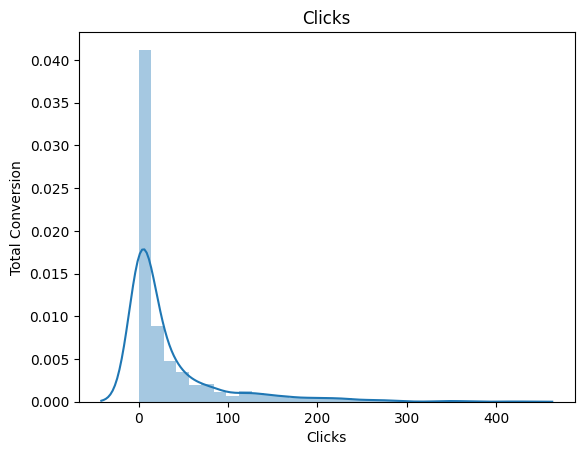

C:\Users\S580381\AppData\Local\Temp\ipykernel_20544\441201559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], bins=30, kde=True)


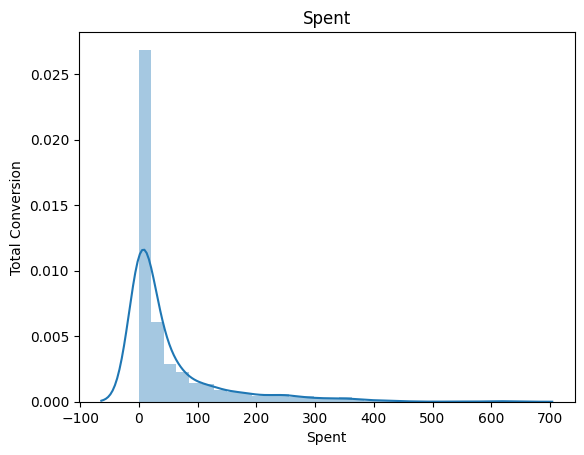

C:\Users\S580381\AppData\Local\Temp\ipykernel_20544\441201559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], bins=30, kde=True)


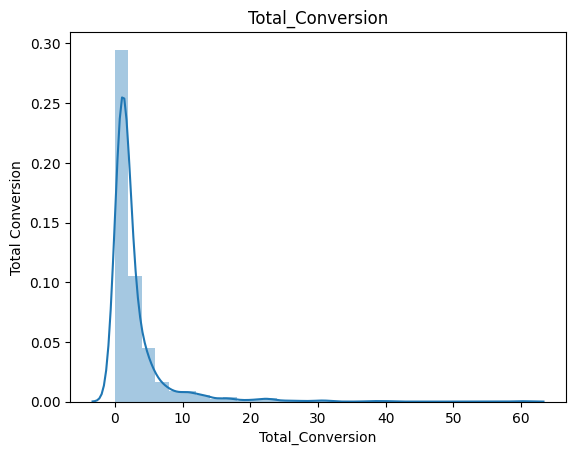

In [14]:
for feature in final_continuous_features:
    data = df.copy()
    sns.distplot(data[feature], bins=30, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Total Conversion')
    plt.title(feature)
    plt.show()

We can see that our data is very skewed to the right. 

**We'll use Yeo-Johnson to transform our data**

Our features and target variables have 0s that cannot be left out and provide insights. That is why we use Yeo-Johnson to transform our data.

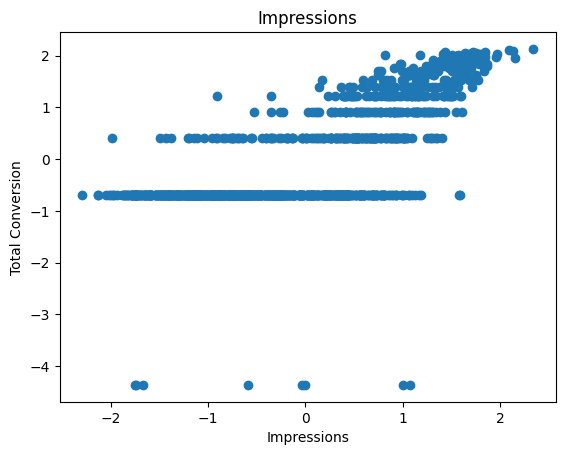

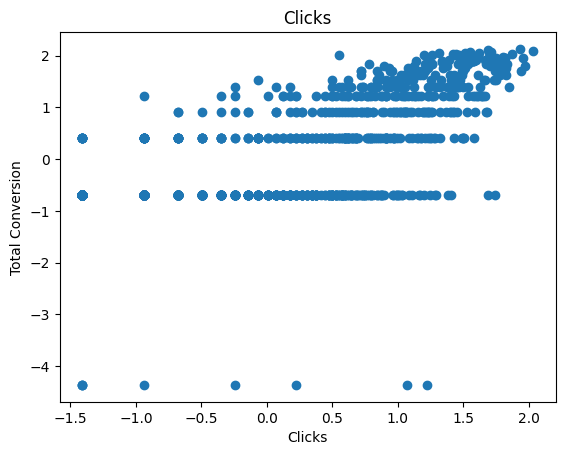

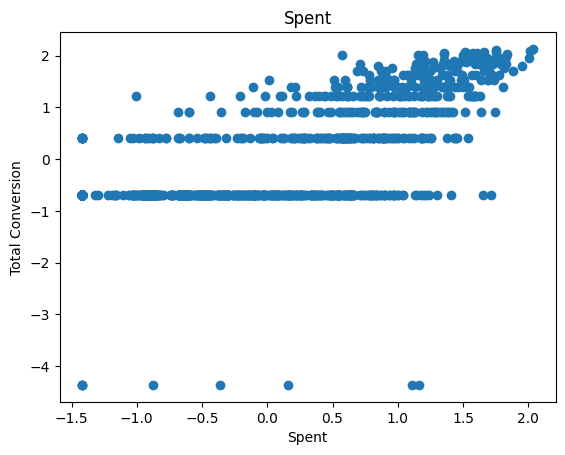

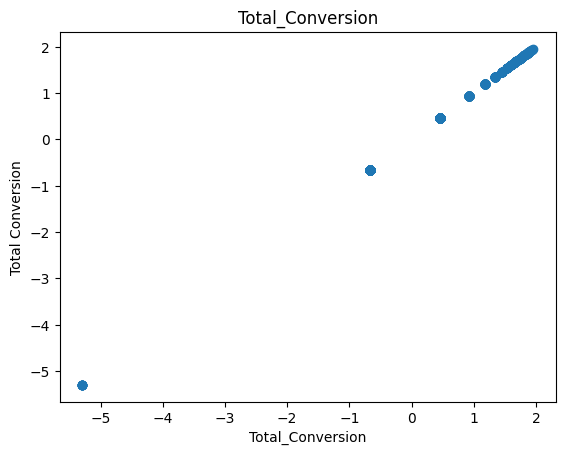

In [15]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

for feature in final_continuous_features:
    dflog = df.copy()
    
    dflog[feature] = pt.fit_transform(dflog[[feature]])
    dflog['Total_Conversion'] = pt.fit_transform(dflog[['Total_Conversion']])
    plt.scatter(dflog[feature], dflog['Total_Conversion'])
    plt.xlabel(feature)
    plt.ylabel('Total Conversion')
    plt.title(feature)
    plt.show()

We can see that out data is far from linear and heavily skewed, so we will go towards a tree based model.

These features are tricky because usually in marketing more ad budget spent means more impressions, and more impressions means more clicks, which means more convrsions. This means that they are highly correlated.

But the relationship isn't always linear because of:

    -Diminishing returns (after a certain point, more impressions do not lead to conversions)

    -Interaction effect (low spend + high CTR converts better than high spend + low CTR)

    -Platform algorithm behavior (ad fatigue, big strategies...)

This is why the features might look linear, but in reality are just correlated.

# **Outliers**

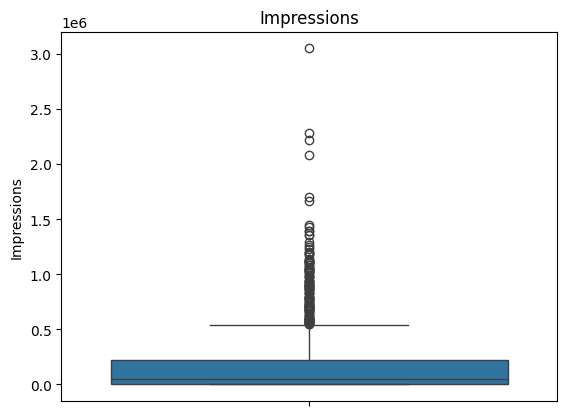

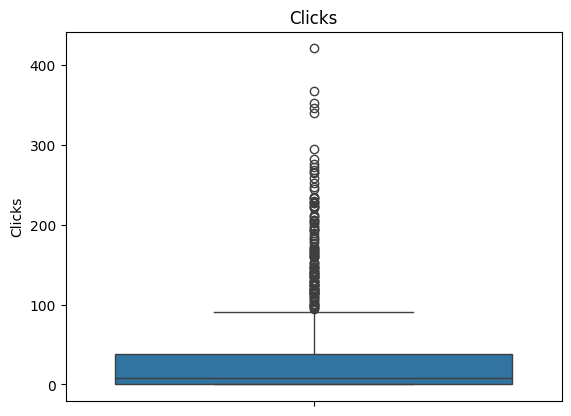

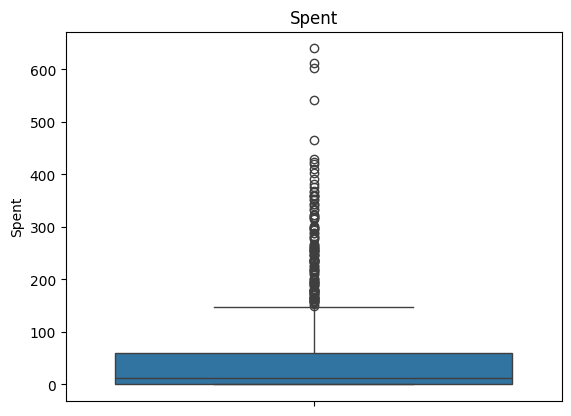

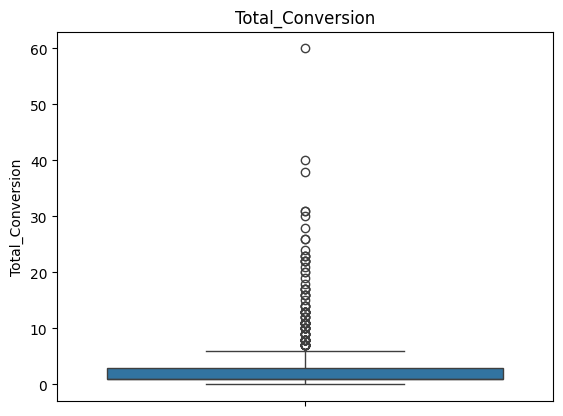

In [17]:
# We will explore outliers
for feature in final_continuous_features:
    data = df.copy()
    sns.boxplot(data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

We can see that we have a lot of outliers, but in our context, these are not really "outliers". A campaign may have 7 times the mean Impression but could also have more ad spent than other campaigns, which makes perfect sense. In out bsiness context, we don't need to deal with outliers unless they heavily affect the our model, which is not the case for tree-based models such as Random Forest or XGBoost.

# **Categorical Features**

In [19]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features: ', len(categorical_features))
categorical_features

Number of categorical features:  1


['Gender']

In [21]:
#Printing the number of unique values in each categorical feature
for feature in categorical_features:
    print('The feature is {} and the number of categories are {}'.format(feature, df[feature].unique()))

The feature is Gender and the number of categories are ['M' 'F']


**Finding the relationship between our categorical feature and Total Conversion**

C:\Users\S580381\AppData\Local\Temp\ipykernel_20544\3270460354.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')


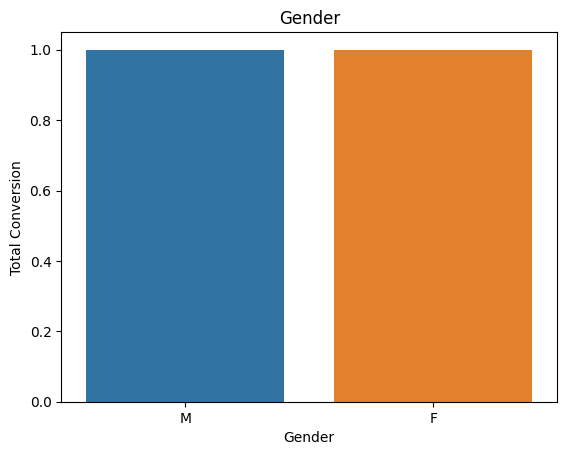

In [24]:
for feature in categorical_features:
    data = df.copy()
    sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')
    plt.xlabel(feature)
    plt.ylabel('Total Conversion')
    plt.title(feature)
    plt.show()

The total conversion meadin for male and female is equal